In [2]:
# Ensure required packages are available
import sys, subprocess
def ensure(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

ensure('pandas')
ensure('matplotlib')
print('Dependencies ready.')

Dependencies ready.


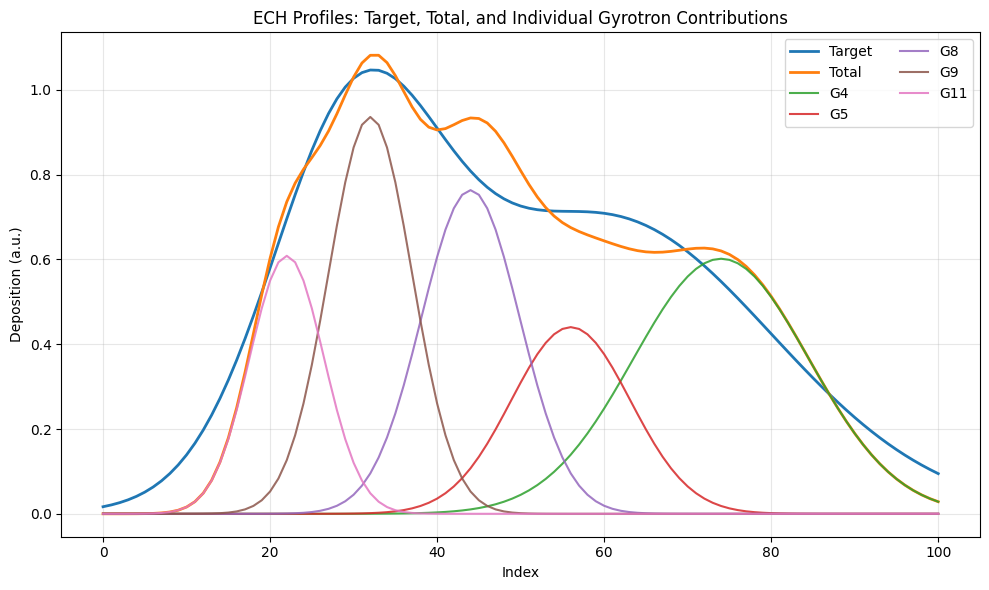

Plot saved to ech_profiles.png with gyros: G4, G5, G8, G9, G11


<Figure size 640x480 with 0 Axes>

In [3]:
# Read CSV and plot profiles with per-gyro contributions
import pandas as pd
import matplotlib.pyplot as plt

csv_path = 'ech_profiles.csv'
df = pd.read_csv(csv_path)

# Basic validation
expected_cols = {'index', 'target', 'total'}
missing = expected_cols - set(df.columns)
if missing:
    raise ValueError(f'CSV missing required columns: {missing}')

x = df['index']
plt.figure(figsize=(10, 6))
plt.plot(x, df['target'], label='Target', linewidth=2)
plt.plot(x, df['total'], label='Total', linewidth=2)

# Plot individual gyro contributions (columns starting with 'G')
gyro_cols = [c for c in df.columns if c.startswith('G')]
for col in gyro_cols:
    plt.plot(x, df[col], label=col, alpha=0.85)

plt.title('ECH Profiles: Target, Total, and Individual Gyrotron Contributions')
plt.xlabel('Index')
plt.ylabel('Deposition (a.u.)')
plt.grid(True, alpha=0.3)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

# Optional: save figure
plt.savefig('ech_profiles.png', dpi=150, bbox_inches='tight')
print(f"Plot saved to ech_profiles.png with gyros: {', '.join(gyro_cols)}")

In [4]:
# Preview data
df.max()

index     100.000000
target      1.046877
total       1.081666
G4          0.601700
G5          0.440363
G8          0.763490
G9          0.936093
G11         0.608583
dtype: float64

In [5]:
# Calculate fitness of total ECH profile vs target (sum of squared error)
import pandas as pd

# Use existing df if available; otherwise read the CSV
try:
    df
except NameError:
    df = pd.read_csv('ech_profiles.csv')

required_cols = {'target', 'total'}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"CSV missing required columns: {missing}")

fitness = float(((df['total'] - df['target']) ** 2).sum())
print(f"Fitness (sum of squared error): {fitness:.6f}")

Fitness (sum of squared error): 0.496201


In [8]:
row_names = []
for i in range(101):
    row_names.append(f'row {i}')

fname='ech_target.txt'
with open(fname,'w') as f:
    f.write('COL_NAMES=|MW/m^2\n')
    f.write('ROW_NAMES=')
    for name in row_names:
        f.write('|%s' % (name))
    f.write('\n')

    for i in range(len(row_names)):
        f.write('\t%.8f\n' % (df['target'][i]))